In [21]:
import pandas as pd
data = {
    "Month":["Jan","Feb","Mar","Apr","May","jun"],
    "Sales":[10000,12000,15000,13000,17000,16000],
    "Profit":[2000,3000,4000,2500,3500,3000]
}
df = pd.DataFrame(data)

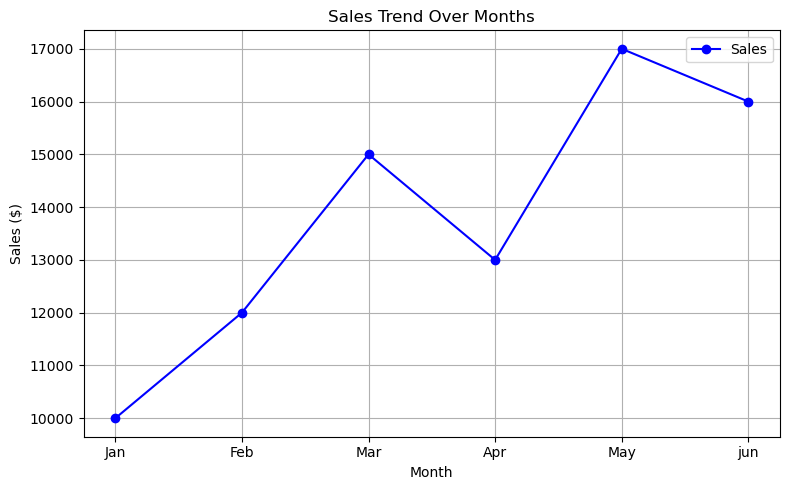

In [22]:
import matplotlib.pyplot as plt

# Line Plot: Sales over Time
plt.figure(figsize=(8, 5))
plt.plot(df['Month'], df['Sales'], color='blue', marker='o', linestyle='-', label='Sales')
plt.title('Sales Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

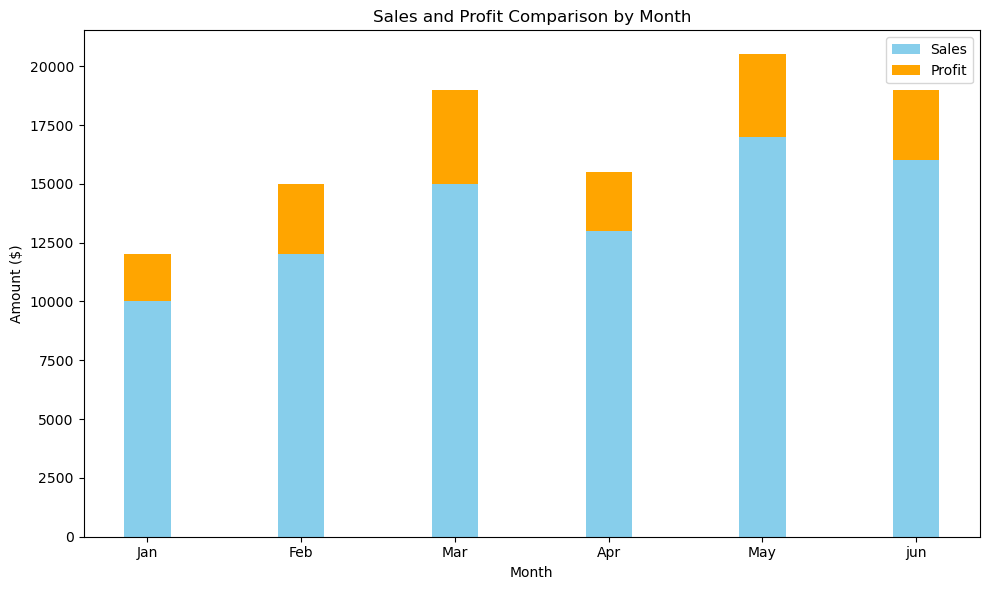

In [23]:

# Bar Plot: Sales vs Profit by Month
plt.figure(figsize=(10, 6))
width = 0.3
plt.bar(df['Month'], df['Sales'], width=width, label='Sales', color='skyblue')
plt.bar(df['Month'], df['Profit'], width=width, label='Profit', color='orange', bottom=df['Sales'])
plt.title('Sales and Profit Comparison by Month')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.tight_layout()
plt.show()

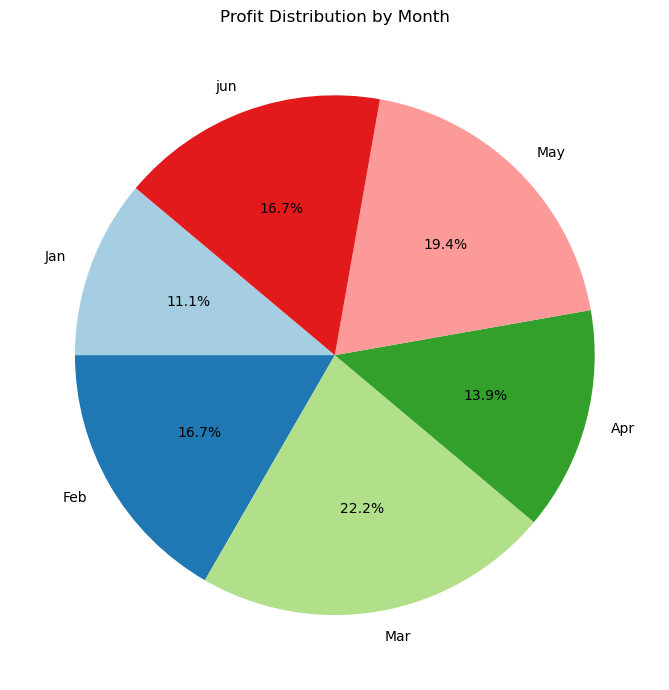

In [27]:
# pie chart : profit distribution by month
plt.figure(figsize=(7,7))
plt.pie(df['Profit'],labels=df['Month'],autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Profit Distribution by Month')
plt.tight_layout()
plt.show()

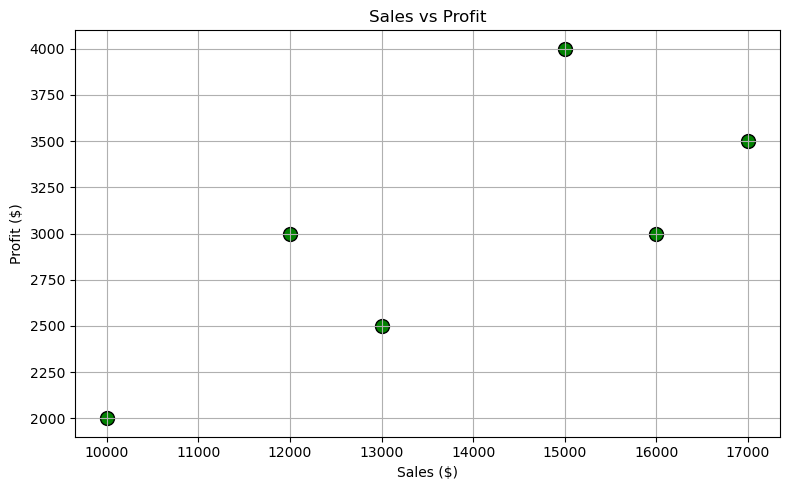

In [28]:

# Scatter Plot: Sales vs Profit (Correlation)
plt.figure(figsize=(8, 5))
plt.scatter(df['Sales'], df['Profit'], color='green', s=100, edgecolors='black')
plt.title('Sales vs Profit')
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

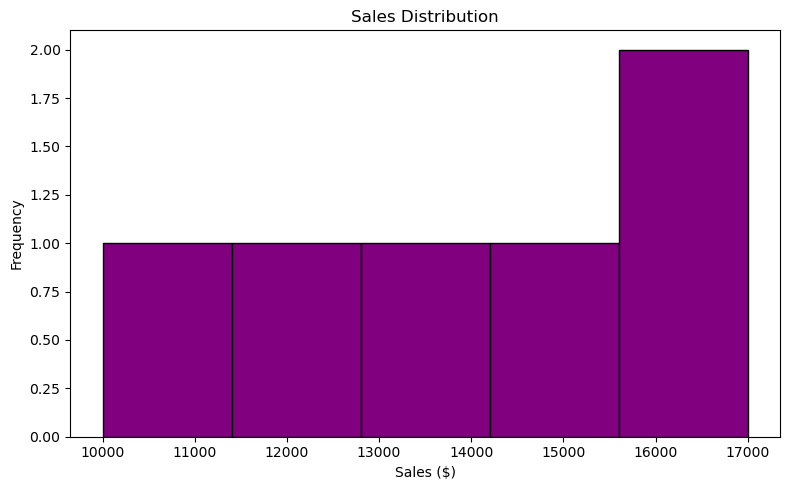

In [29]:
# histogram Distrubution of sales
plt.figure(figsize=(8,5))
plt.hist(df['Sales'], bins=5, color='purple', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

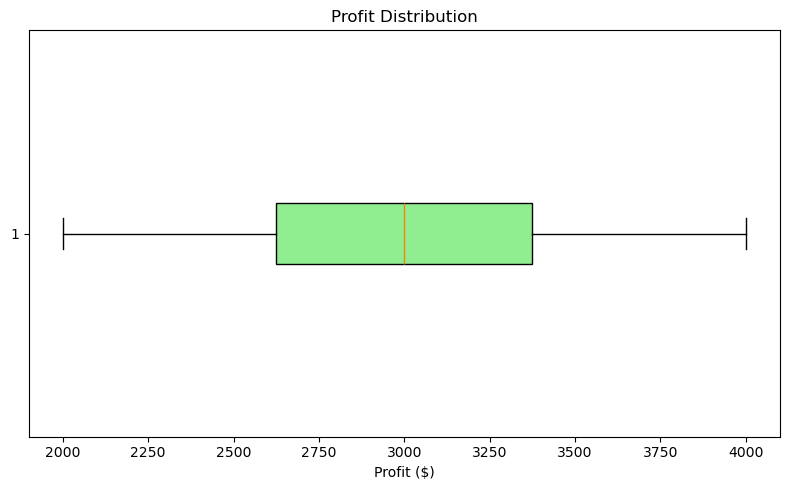

In [34]:

# Box Plot: Profit Distribution
plt.figure(figsize=(8, 5))
plt.boxplot(df['Profit'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title('Profit Distribution')
plt.xlabel('Profit ($)')
plt.tight_layout()
plt.show()

# A box plot showing the spread and outliers of Profit.

In [ ]:
! pip install gradio

In [ ]:

import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"],
    "Sales": [10000, 12000, 15000, 13000, 17000, 16000],
    "Profit": [2000, 3000, 4000, 2500, 3500, 3000]
}
df = pd.DataFrame(data)

# Function to return selected plot
def generate_plot(plot_type):
    fig = plt.figure(figsize=(8, 5))

    if plot_type == "Line Plot":
        plt.plot(df['Month'], df['Sales'], color='blue', marker='o', label='Sales')
        plt.title('Sales Trend Over Months')
        plt.xlabel('Month')
        plt.ylabel('Sales ($)')
        plt.grid(True)
        plt.legend()

    elif plot_type == "Stacked Bar Chart":
        fig.set_size_inches(10, 6)
        width = 0.3
        plt.bar(df['Month'], df['Sales'], width=width, label='Sales', color='skyblue')
        plt.bar(df['Month'], df['Profit'], width=width, label='Profit', color='orange', bottom=df['Sales'])
        plt.title('Sales and Profit Comparison by Month')
        plt.xlabel('Month')
        plt.ylabel('Amount ($)')
        plt.legend()

    elif plot_type == "Pie Chart":
        fig.set_size_inches(7, 7)
        plt.pie(df['Profit'], labels=df['Month'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
        plt.title('Profit Distribution by Month')

    elif plot_type == "Scatter Plot":
        plt.scatter(df['Sales'], df['Profit'], color='green', s=100, edgecolors='black')
        plt.title('Sales vs Profit')
        plt.xlabel('Sales ($)')
        plt.ylabel('Profit ($)')
        plt.grid(True)

    elif plot_type == "Histogram":
        plt.hist(df['Sales'], bins=5, color='purple', edgecolor='black')
        plt.title('Sales Distribution')
        plt.xlabel('Sales ($)')
        plt.ylabel('Frequency')

    elif plot_type == "Box Plot":
        plt.boxplot(df['Profit'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
        plt.title('Profit Distribution')
        plt.xlabel('Profit ($)')

    plt.tight_layout()
    return fig

# Gradio UI
demo = gr.Interface(
    fn=generate_plot,
    inputs=gr.Radio(
        ["Line Plot", "Stacked Bar Chart", "Pie Chart", "Scatter Plot", "Histogram", "Box Plot"],
        label="Choose Plot Type"
    ),
    outputs=gr.Plot(label="Visualization"),
    title="Sales & Profit Visual Explorer",
    description="Choose a chart type to visualize the data."
)

demo.launch()